In [1]:
# Before everything
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

from numpy import load
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
import numpy as np



numpy_file_dir = "drive/My Drive/NN_files/"
# load dict of arrays
X_train_test = load(numpy_file_dir + "X_train_test.npz")
y_train_test = load(numpy_file_dir + "y_train_test.npz")

# extract the first array
X_train_test = X_train_test["arr_0"]# jest typ uint8
y_train_test = y_train_test["arr_0"]
# check image shape
print(X_train_test.shape)
print(y_train_test.shape)




# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2, shuffle= True) # random_state=42

# sprawdzić random state
# print(y_test[:10]) # [1 5 5 5 0 3 4 0 0 0] jest dobrze, cały czas daje takie same losowe dane

# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# create model
model = Sequential()

# add model layers
# 64 - liczba neuronów, kernel_size - maska 3x3,
model.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(220, 220, 3), data_format="channels_last"))
model.add(Conv2D(32, kernel_size=5, activation="relu"))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
# model.add(Dropout(0.3)) # użycie gdy jest przeuczony, dużo więcej acc niż val_acc
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
# model.add(Conv2D(8, kernel_size=3, activation="relu"))#
# model.add(Conv2D(8, kernel_size=3, activation="relu"))
# model.add(Conv2D(8, kernel_size=3, activation="relu"))

# warstwa łącząca conv2d z warstwą dense
model.add(Flatten())
# liczba taka ile wyjść, tu 10 liczb (u mnie będzie 6 wyjść bo tyle jest typów)
model.add(Dense(6, activation="softmax"))

Using TensorFlow backend.


(15240, 220, 220, 3)
(15240,)


In [2]:
# compile model using accuracy to measure model performance
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), loss="categorical_crossentropy", metrics=["accuracy"]) # Adadelta, Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=False)

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=100, shuffle=True)

Train on 12192 samples, validate on 3048 samples
Epoch 1/200
12192/12192 [==============================] - 128s 10ms/step - loss: 1.1995 - accuracy: 0.5085 - val_loss: 0.7325 - val_accuracy: 0.7421
Epoch 2/200
12192/12192 [==============================] - 109s 9ms/step - loss: 0.6069 - accuracy: 0.7826 - val_loss: 0.5022 - val_accuracy: 0.8297
Epoch 3/200
12192/12192 [==============================] - 109s 9ms/step - loss: 0.5097 - accuracy: 0.8273 - val_loss: 0.4861 - val_accuracy: 0.8264
Epoch 4/200
12192/12192 [==============================] - 109s 9ms/step - loss: 0.4642 - accuracy: 0.8475 - val_loss: 0.4145 - val_accuracy: 0.8727
Epoch 5/200
12192/12192 [==============================] - 109s 9ms/step - loss: 0.4455 - accuracy: 0.8520 - val_loss: 0.4246 - val_accuracy: 0.8543
Epoch 6/200
12192/12192 [==============================] - 109s 9ms/step - loss: 0.4293 - accuracy: 0.8561 - val_loss: 0.4080 - val_accuracy: 0.8645
Epoch 7/200
12192/12192 [==============================]

In [3]:
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       526
           1       0.99      0.99      0.99       497
           2       0.98      0.99      0.99       484
           3       0.96      0.94      0.95       506
           4       0.97      0.97      0.97       501
           5       1.00      1.00      1.00       534

    accuracy                           0.98      3048
   macro avg       0.98      0.98      0.98      3048
weighted avg       0.98      0.98      0.98      3048



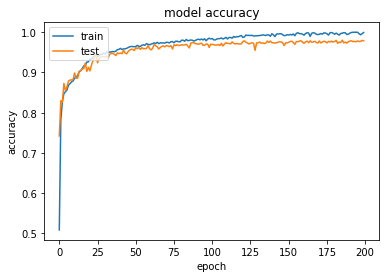

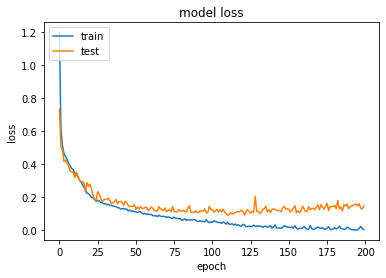

In [4]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Zapisanie modelu do pliku
model.save('model.h5')